Chapter 4 

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

4. Clean the Gathered Dataset

The initial dataset is a csv containing companies house information for all comapanies in the UK & NI which fall under the SICCODE 22190. The original dataset had 4619 rows, which included information from the last 7 financial years. For my analysis i chose to filter the data to focus on one year - 2021. I chose to do this to give an up to date picture of companies in the industry as it stands. I used Microsoft Excel to filter the data on the column 'Current Year' as 2021 and saved the csv as a new file -"2021_data.csv". The new file is 406 rows long and is read in in line - In[2]

4.1. Load Your Data

In [2]:
#checking to see if all rows and columns have been read in

df = pd.read_csv("2021_data.csv")

In [3]:
#showing column names

df.shape

(406, 72)

In [4]:
#data types of each column, if values in a column are mixed the data type will be returned as an object

df.columns

Index(['Company Name', 'Company Number', 'Registered office address',
       'Company status', 'Company type', 'Incorporated on',
       'Nature of business (SIC) 0', 'Nature of business (SIC) 1',
       'Nature of business (SIC) 2', 'Nature of business (SIC) 3',
       'No. Officers', 'Officer Name 1', 'Role 1', 'Status 1', 'DOB 1',
       'Appointed On 1', 'Nationality 1', 'Country of Residence 1',
       'Officer Name 2', 'Role 2', 'Status 2', 'DOB 2', 'Appointed On 2',
       'Nationality 2', 'Country of Residence 2', 'Officer Name 3', 'Role 3',
       'Status 3', 'DOB 3', 'Appointed On 3', 'Nationality 3',
       'Country of Residence 3', 'Officer Name 4', 'Role 4', 'Status 4',
       'DOB 4', 'Appointed On 4', 'Nationality 4', 'Country of Residence 4',
       'Officer Name 5', 'Role 5', 'Status 5', 'DOB 5', 'Appointed On 5',
       'Nationality 5', 'Country of Residence 5', 'Officer Name 6', 'Role 6',
       'Status 6', 'DOB 6', 'Appointed On 6', 'Nationality 6',
       'Country 

In [5]:
df.dtypes

Company Name                 object
Company Number               object
Registered office address    object
Company status               object
Company type                 object
                              ...  
Net Fixed Assets(PREV)       object
Current Assets(PREV)         object
Creditors(PREV)              object
Equity(PREV)                 object
Employees(PREV)              object
Length: 72, dtype: object

In [6]:
#summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company Name                406 non-null    object
 1   Company Number              406 non-null    object
 2   Registered office address   406 non-null    object
 3   Company status              406 non-null    object
 4   Company type                406 non-null    object
 5   Incorporated on             406 non-null    object
 6   Nature of business (SIC) 0  405 non-null    object
 7   Nature of business (SIC) 1  89 non-null     object
 8   Nature of business (SIC) 2  48 non-null     object
 9   Nature of business (SIC) 3  28 non-null     object
 10  No. Officers                406 non-null    object
 11  Officer Name 1              406 non-null    object
 12  Role 1                      406 non-null    object
 13  Status 1                    406 non-null    object

In [7]:
#importing tools

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data cleaning before density estimation

In [8]:
#Changing Not Available to NaN
df['Employees(CUR)'] = pd.to_numeric(df['Employees(CUR)'],errors = 'coerce')

In [9]:
df['Employees(CUR)'].value_counts()

1.0      47
0.0      46
2.0      46
5.0      24
3.0      21
9.0      15
6.0      14
4.0      10
12.0      9
15.0      9
16.0      8
7.0       7
8.0       6
11.0      6
18.0      6
21.0      5
20.0      5
10.0      4
13.0      4
14.0      4
27.0      4
22.0      3
23.0      3
31.0      3
40.0      3
24.0      3
56.0      2
19.0      2
38.0      2
37.0      2
49.0      2
48.0      2
25.0      2
30.0      2
32.0      2
63.0      1
65.0      1
66.0      1
61.0      1
58.0      1
55.0      1
53.0      1
51.0      1
34.0      1
41.0      1
45.0      1
44.0      1
43.0      1
42.0      1
33.0      1
17.0      1
26.0      1
167.0     1
29.0      1
433.0     1
Name: Employees(CUR), dtype: int64

In [10]:
#Changing NaN to median value. I have assumed that the data is 'missing completely at random (MCAR)'.
#It is likely that the missing values are close to the median.
#Replacing the missing values with the median will have no effect on the outliers
# I chose median instead of mean as median is less susceptible to influence from outliers

df['Employees(CUR)'] = df['Employees(CUR)'].fillna(df['Employees(CUR)'].median())

In [11]:
# Get the count of unique values in the 'Employees(CUR)' column after NaN replaced

df['Employees(CUR)'].value_counts()

5.0      77
1.0      47
2.0      46
0.0      46
3.0      21
9.0      15
6.0      14
4.0      10
15.0      9
12.0      9
16.0      8
7.0       7
11.0      6
8.0       6
18.0      6
21.0      5
20.0      5
27.0      4
10.0      4
13.0      4
14.0      4
23.0      3
22.0      3
40.0      3
24.0      3
31.0      3
25.0      2
19.0      2
37.0      2
30.0      2
32.0      2
38.0      2
48.0      2
49.0      2
56.0      2
66.0      1
167.0     1
65.0      1
26.0      1
17.0      1
63.0      1
433.0     1
33.0      1
34.0      1
41.0      1
42.0      1
43.0      1
44.0      1
45.0      1
51.0      1
53.0      1
55.0      1
58.0      1
61.0      1
29.0      1
Name: Employees(CUR), dtype: int64

4.2. Density Estimation

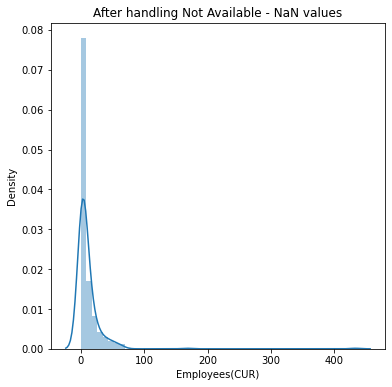

In [12]:
#use a Kernal density estimation plot to represent the distribution of the employee data

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Employees(CUR)'])
p = plt.title('After handling Not Available - NaN values')

Analysing the distribution plot above.

As we can see from the graph, on the x-axis the tail stretches long to the right. This means most of our data points are distributed to the left, our graph is positively skewed. To make sure our data follows a Gaussian Normal Curve we should identify any outliers and deal with them appropriately. This will allow us to make better predictions from our data.


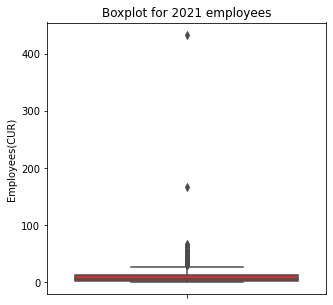

In [13]:
#box plot for employee data 
plt.figure(figsize=(5,5))
sns.boxplot(y='Employees(CUR)', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for 2021 employees')
p = plt.ylabel('Employees(CUR)')

Identifying outliers - The interquartile range (IQR) is the distance between the third quartile and the first quartile. any data value is considered to be an outlier if it is 1.5 times the IQR larger than the third quartile or 1.5 times the IQR smaller than the first quartile.

4.3. Identify Outliers

In [14]:
# function to find outliers 
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

Analysing outliers:

In [15]:
outliers = find_outliers_IQR(df['Employees(CUR)'])

In [16]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 38


In [17]:
print("max outlier value: "+ str(outliers.max()))

max outlier value: 433.0


In [18]:
print("min outlier value: "+ str(outliers.min()))

min outlier value: 29.0


In [19]:
#Assigning a new value (the mean) to outliers
def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )

   return df

In [20]:
# temporary dataframe to analyse the distribution with the outliers removed
df['Employees(CUR)'] = impute_outliers_IQR(df['Employees(CUR)'])

In [21]:
df.shape

(406, 72)

4.3.1. Analysis after handling outliers 

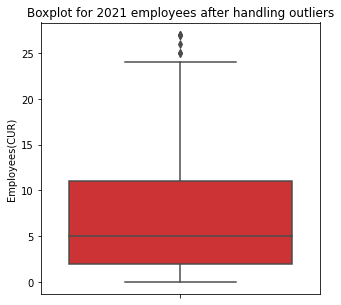

In [22]:
#boxplot after handling outliers
#please see 4.4 demostration of problem solving below as outliers still remain after running impute outlier function

plt.figure(figsize=(5,5))
sns.boxplot(y='Employees(CUR)', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for 2021 employees after handling outliers')
p = plt.ylabel('Employees(CUR)')

No. of employees Mean
---------------
6.661869979858767


Text(0, 0.5, 'Probability Density')

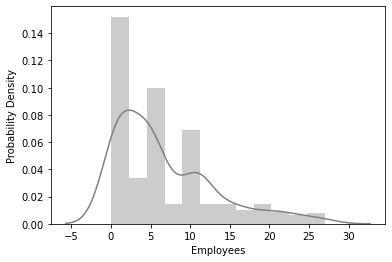

In [23]:
# Density plot after handling outliers

number_employees = df['Employees(CUR)']
print("No. of employees Mean")
print("---------------")
print(number_employees.mean())
sns.distplot(number_employees, color='grey')
plt.xlabel('Employees')
plt.ylabel('Probability Density')

Analysing new density plot above





Applying the central limit theorem to our data

The central limit theorem states that if we take repeated random samples from the dataset and calculate the mean value of each sample, then the distribution of the sample means will be approximately normally distributed, even if the samples it came from are not normal.

Knowing the central limit theorem will allow us to make better estimations about the charachteristics of larger groups of companies.

Applying this to our data we would expect the sample mean distribution of a random variable will assume a near-normal or normal distribution if the sample size is large enough.
We will continually increase our sample size to see how it affects the shape of our plotted data:

In [24]:
# Function to calculaate the sample mean

mean = []
def calc_sample_mean(sample_size, no_of_sample_means): 
    for i in range(no_of_sample_means): 
        global number_employees
        sample_number_employees = number_employees.sample(n=sample_size)
        sample_mean=sample_number_employees.mean()
        mean.append(sample_mean)
    return mean

Text(0, 0.5, 'Probability Density sample size 2')

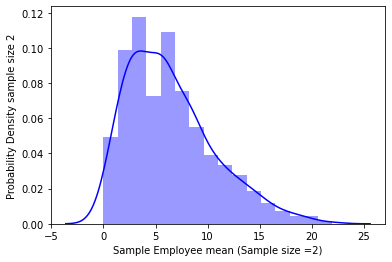

In [25]:
# distribution with a sample size of 2 

mean_2=calc_sample_mean(sample_size=2, no_of_sample_means=500)
sns.distplot(mean_2, color='b')
plt.xlabel('Sample Employee mean (Sample size =2)')
plt.ylabel('Probability Density sample size 2')

Text(0, 0.5, 'Probability Density sample size 3')

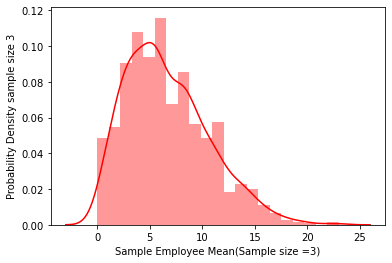

In [26]:
mean_3=calc_sample_mean(sample_size=3, no_of_sample_means=500)
sns.distplot(mean_3, color='r')
plt.xlabel('Sample Employee Mean(Sample size =3)')
plt.ylabel('Probability Density sample size 3')

Text(0, 0.5, 'Probability Density sample size 10')

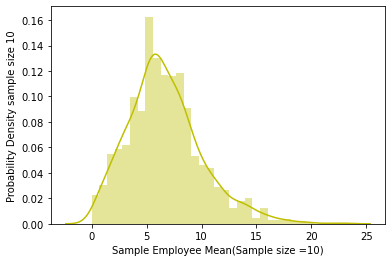

In [27]:
mean_10=calc_sample_mean(sample_size=10, no_of_sample_means=500)
sns.distplot(mean_10, color='y')
plt.xlabel('Sample Employee Mean(Sample size =10)')
plt.ylabel('Probability Density sample size 10')

Text(0, 0.5, 'Probability Density')

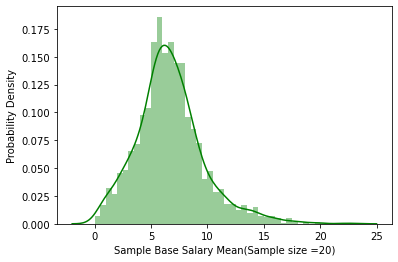

In [28]:
mean_20=calc_sample_mean(sample_size=20, no_of_sample_means=500)
sns.distplot(mean_20, color='g')
plt.xlabel('Sample Base Salary Mean(Sample size =20)')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density sample size 30')

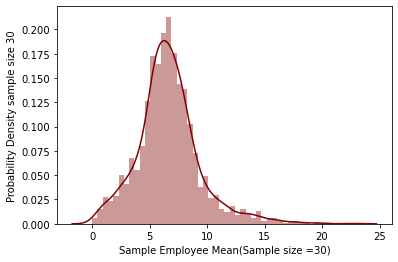

In [29]:
# The higher the sample size becomes the closer the sample approximates a normal distribution
#Sample sizes 30 or greater are considered sufficient enough for the Central Limit Theory to hold

mean_30=calc_sample_mean(sample_size=30, no_of_sample_means=500)
sns.distplot(mean_30, color='maroon')
plt.xlabel('Sample Employee Mean(Sample size =30)')
plt.ylabel('Probability Density sample size 30')

As the sample size increases, the skewness reduced and the curve became sharper
This shows that no matter what our population distribution curve is, the sample means will always follow Gaussian (Normal) Distribution. This will be useful for someone picking up on this project to make better estimations about larger populations of company data.

Move on to clean Current assets column column

We will repeat the steps above and apply it to the 'Current Assets(CUR)' column of our dataset with some extra steps

In [30]:
df['Current Assets(CUR)'].shape

(406,)

In [31]:
df['Current Assets(CUR)'].value_counts()

Not Available    49
100              14
1                 5
1000              3
2                 2
                 ..
1,336,649         1
371,024           1
1,354,255         1
633,002           1
1,303             1
Name: Current Assets(CUR), Length: 336, dtype: int64

In [32]:
#removing commas
df['Current Assets(CUR)'] = df['Current Assets(CUR)'].str.replace(',','')

In [33]:
df['Current Assets(CUR)'].value_counts()

Not Available    49
100              14
1                 5
1000              3
2                 2
                 ..
1336649           1
371024            1
1354255           1
633002            1
1303              1
Name: Current Assets(CUR), Length: 336, dtype: int64

In [34]:
df['Current Assets(CUR)'] = pd.to_numeric(df['Current Assets(CUR)'],errors = 'coerce')

In [35]:
df['Current Assets(CUR)'] = df['Current Assets(CUR)'].fillna(df['Current Assets(CUR)'].median())

In [36]:
df['Current Assets(CUR)'].value_counts()

231207.0     50
100.0        14
1.0           5
1000.0        3
2.0           2
             ..
1336649.0     1
371024.0      1
1354255.0     1
633002.0      1
1303.0        1
Name: Current Assets(CUR), Length: 335, dtype: int64

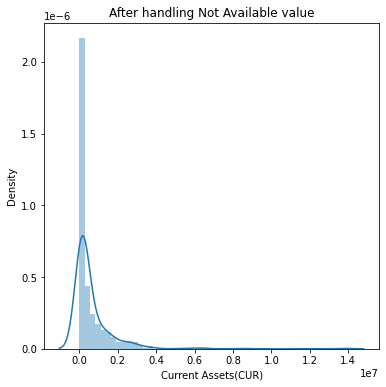

In [37]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Current Assets(CUR)'])
p = plt.title('After handling Not Available value')

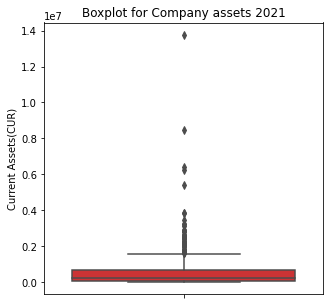

In [38]:
#box plot for asset data 
plt.figure(figsize=(5,5))
sns.boxplot(y='Current Assets(CUR)', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Company assets 2021')
p = plt.ylabel('Current Assets(CUR)')

In [39]:
outliers = find_outliers_IQR(df['Current Assets(CUR)'])

In [40]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 44


In [41]:
print("max outlier value: "+ str(outliers.max()))

max outlier value: 13767668.0


In [42]:
print("min outlier value: "+ str(outliers.min()))

min outlier value: 1616896.0


In [43]:
df['Current Assets(CUR)'] = impute_outliers_IQR(df['Current Assets(CUR)'])

In [44]:
df['Current Assets(CUR)'].value_counts()

231207.000000    50
611634.748768    44
100.000000       14
1.000000          5
1000.000000       3
                 ..
891339.000000     1
165776.000000     1
670123.000000     1
355624.000000     1
1303.000000       1
Name: Current Assets(CUR), Length: 292, dtype: int64

In [45]:
df['Current Assets(CUR)'].describe

<bound method NDFrame.describe of 0         100.0
1      231207.0
2      231207.0
3      231207.0
4           1.0
         ...   
401     34470.0
402        10.0
403     50693.0
404    189498.0
405      1303.0
Name: Current Assets(CUR), Length: 406, dtype: float64>

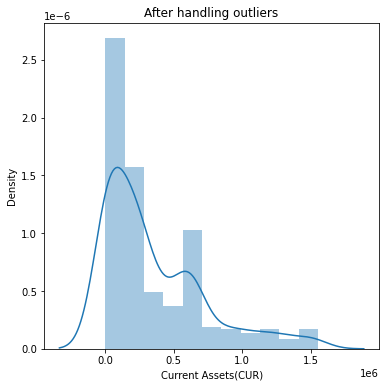

In [46]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Current Assets(CUR)'])
p = plt.title('After handling outliers')

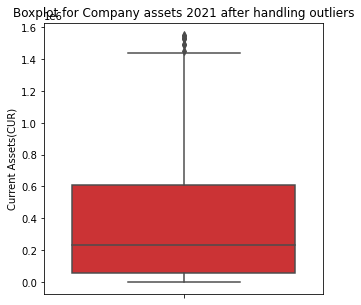

In [47]:
#box plot for asset data 
#please see 4.4 below for problems

plt.figure(figsize=(5,5))
sns.boxplot(y='Current Assets(CUR)', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Company assets 2021 after handling outliers')
p = plt.ylabel('Current Assets(CUR)')

4.4. Demonstration of Problem Solving 

Working through this analysis i encountered a number of problems:

-When attempting to plot a density graph with the 'Employee (CUR)' for the first time i hadnt removed the 'not available'   cells from the original dataset. When i ran the code i got an error: could not convert string to float: 'Not Available'. This is begause the 'ot available' is non numeric and recognised as a string value.
Using google and the website stackoverflow i found the following code to handle the error :

df['Employees(CUR)'] = pd.to_numeric(df['Employees(CUR)'],errors = 'coerce')

This line of code iterates through the column of data and replaces any non-numeric cell with the value NaN (Not A Number) which will then prevent the error seen above. 

-As mentioned above i also found that after running the function to remove the outliers, some outliers were still visible when i re-plotted the boxplot. I spent quite a bit of time trying different functions to exclude the outliers with the same result as the function i have left included.I have not solved this problem but believe it is not the function were the outliers are removed to be the issue but a different line of code.
     In the line of code: df['Employees(CUR)'] = df['Employees(CUR)'].fillna(df['Employees(CUR)'].median())
i replace the NaN values in the column with the median value of the column. I am not sure why but i think this line of code is affecting the outliers that are left in after running the impute outlier function. This warrants further investigation to see if the problem can be solved 




*Please note there is a separate notebook for chapter four with an analysis of a second dataset which will contain parts 4.5, 4.5.1, 4.5.2, 4.6, 4.7

